Convolution Network

https://pytorch.org/tutorials/_images/mnist.png


In [38]:
%config IPCompleter.greedy=True
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

In [39]:
class TestNet(nn.Module):
    def __init__(self):
        super().__init__()
        #self.conv = nn.Conv2d(1, 2, 1)
        self.lin = nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y = self.lin(x)
        return y


In [40]:
net = TestNet()
params = list(net.parameters())
params

[Parameter containing:
 tensor([[0.1336]], requires_grad=True), Parameter containing:
 tensor([-0.9990], requires_grad=True)]

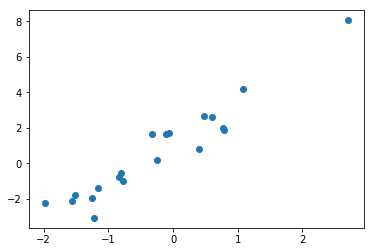

In [41]:
x_raw = np.random.randn(20)
y_raw = (2 * x_raw + 1) + np.random.randn(20)
x = np.asarray(x_raw, dtype=np.float32).reshape(-1, 1)
y = np.asarray(y_raw, dtype=np.float32).reshape(-1, 1)
plt.scatter(x,y)

Training of the model

In [118]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
epochs = 100
input_var = Variable(torch.from_numpy(x))
labels = Variable(torch.from_numpy(y))

In [119]:
net.train()
for i in range(20):
    optimizer.zero_grad()    
    output = net.forward(input_var)
    loss = loss_function(output, labels)
    loss.backward()
    optimizer.step()
    print("epoch = {}\t loss = {}\t m:{} \t b:{}".format(i, loss, params[0].item(), params[1].item()))

epoch = 0	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 1	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 2	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 3	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 4	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 5	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 6	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 7	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 8	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 9	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 10	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 11	 loss = 0.5555999279022217	 m:2.249877691268921 	 b:1.202512264251709
epoch = 12	 loss = 0.5555999279022217	

Prediction

In [128]:
net.eval()
predicted = net.forward(input_var).data.numpy()
predicted

array([[ 0.46841288],
       [ 1.0617554 ],
       [ 0.63668305],
       [-1.6177509 ],
       [ 2.2842379 ],
       [-0.6626762 ],
       [ 0.94892097],
       [-1.5646555 ],
       [ 2.5499864 ],
       [ 2.088234  ],
       [ 2.9298835 ],
       [-2.2249205 ],
       [-3.2603087 ],
       [-2.327214  ],
       [ 2.9662657 ],
       [ 7.2831717 ],
       [-1.424216  ],
       [-0.5972816 ],
       [ 3.630547  ],
       [-0.5379348 ]], dtype=float32)

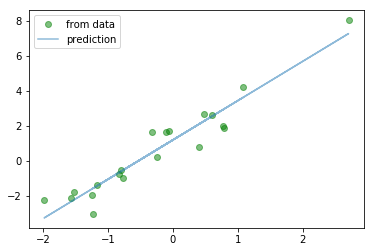

OrderedDict([('lin.weight', tensor([[2.2499]])), ('lin.bias', tensor([1.2025]))])


In [132]:
plt.plot(x, y, 'go', label = 'from data', alpha = .5)
plt.plot(x, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(net.state_dict())

GPU Training


In [133]:
torch.cuda.is_available()

False